<a href="https://colab.research.google.com/github/Amit-Padye/Machine-learning/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

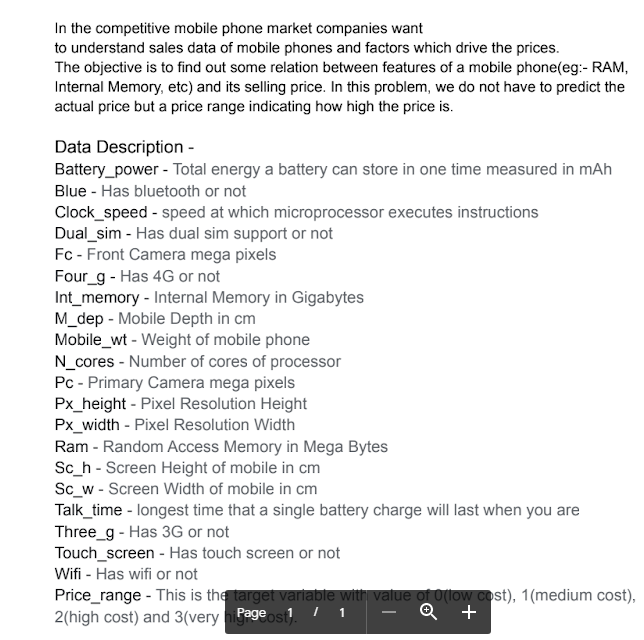

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#For different price range

In [ ]:
df[df['price_range']==0].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1116.902000,0.486000,1.550200,0.500000,4.084000,0.518000,31.174000,0.490200,140.552000,4.600000,9.574000,536.408000,1150.27000,785.314000,12.324000,5.682000,10.612000,0.746000,0.524000,0.496000,0.0
std,410.801305,0.500305,0.848941,0.500501,4.183772,0.500176,18.101023,0.288184,36.378319,2.268544,6.095805,372.824164,413.00178,362.755397,4.206949,4.174173,5.397009,0.435734,0.499924,0.500485,0.0
min,503.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.00000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,770.500000,0.000000,0.600000,0.000000,1.000000,0.000000,15.000000,0.200000,108.750000,3.000000,4.000000,229.000000,805.75000,488.750000,9.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.0
50%,1066.000000,0.000000,1.550000,0.500000,3.000000,1.000000,30.000000,0.500000,142.000000,5.000000,9.500000,465.500000,1132.50000,719.500000,12.000000,5.000000,10.000000,1.000000,1.000000,0.000000,0.0
75%,1431.250000,1.000000,2.300000,1.000000,6.000000,1.000000,47.000000,0.700000,173.000000,7.000000,15.000000,776.500000,1452.75000,1037.000000,16.000000,8.250000,15.000000,1.000000,1.000000,1.000000,0.0
max,1994.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1878.000000,1989.00000,1974.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
df[df['price_range']==1].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1228.868000,0.490000,1.488600,0.510000,4.340000,0.524000,32.116000,0.524000,140.510000,4.298000,9.924000,666.892000,1251.908000,1679.490000,12.212000,5.544000,11.362000,0.756000,0.522000,0.504000,1.0
std,438.614528,0.500401,0.814479,0.500401,4.499432,0.499924,18.000739,0.286895,35.678956,2.311684,6.124806,441.351209,433.564352,465.850159,4.226913,4.238868,5.570729,0.429923,0.500016,0.500485,0.0
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,387.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,843.000000,0.000000,0.600000,0.000000,1.000000,0.000000,16.000000,0.300000,109.000000,2.000000,4.000000,327.250000,878.750000,1354.000000,8.000000,2.000000,7.000000,1.000000,0.000000,0.000000,1.0
50%,1206.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,606.000000,1223.000000,1686.500000,12.000000,5.000000,12.000000,1.000000,1.000000,1.000000,1.0
75%,1596.250000,1.000000,2.200000,1.000000,7.000000,1.000000,47.000000,0.800000,170.000000,6.000000,15.000000,944.250000,1629.000000,2033.750000,16.000000,8.000000,16.000000,1.000000,1.000000,1.000000,1.0
max,1996.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1914.000000,1998.000000,2811.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
df[df['price_range']==2].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.0
mean,1228.320000,0.486000,1.529800,0.498000,4.49800,0.494000,30.920000,0.490800,143.614000,4.682000,10.018000,632.284000,1234.046000,2582.816000,12.010000,5.714000,10.97200,0.774000,0.470000,0.504000,2.0
std,452.863065,0.500305,0.804404,0.500497,4.34739,0.500465,18.441958,0.286215,34.320326,2.262546,5.952861,445.789232,427.757151,496.211735,4.234355,4.265747,5.43307,0.418658,0.499599,0.500485,0.0
min,501.000000,0.000000,0.500000,0.000000,0.00000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,10.000000,508.000000,1185.000000,5.000000,0.000000,2.00000,0.000000,0.000000,0.000000,2.0
25%,816.500000,0.000000,0.700000,0.000000,1.00000,0.000000,15.000000,0.200000,114.000000,3.000000,5.000000,252.500000,862.500000,2292.750000,8.000000,2.000000,6.00000,1.000000,0.000000,0.000000,2.0
50%,1219.500000,0.000000,1.500000,0.000000,3.00000,0.000000,30.000000,0.500000,145.000000,5.000000,10.000000,538.500000,1221.500000,2577.000000,12.000000,5.000000,11.00000,1.000000,0.000000,1.000000,2.0
75%,1635.750000,1.000000,2.200000,1.000000,7.00000,1.000000,48.000000,0.700000,172.000000,7.000000,15.000000,942.750000,1613.250000,2927.000000,16.000000,8.000000,16.00000,1.000000,1.000000,1.000000,2.0
max,1998.000000,1.000000,3.000000,1.000000,18.00000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1997.000000,3916.000000,19.000000,17.000000,20.00000,1.000000,1.000000,1.000000,2.0


In [ ]:
df[df['price_range']==3].describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.0
mean,1379.984000,0.518000,1.52040,0.530000,4.316000,0.550000,33.976000,0.502000,136.320000,4.502000,10.150000,744.848000,1369.838000,3449.232000,12.680000,6.12800,11.098000,0.770000,0.496000,0.524000,3.0
std,414.992261,0.500176,0.79645,0.499599,4.332399,0.497992,17.930377,0.291901,34.911994,2.297074,6.085521,483.720179,426.823571,393.019923,4.168976,4.71679,5.443129,0.421254,0.500485,0.499924,0.0
min,503.000000,0.000000,0.50000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,501.000000,2259.000000,5.000000,0.00000,2.000000,0.000000,0.000000,0.000000,3.0
25%,1034.750000,0.000000,0.70000,0.000000,1.000000,0.000000,18.000000,0.200000,104.000000,2.000000,5.000000,341.750000,1041.500000,3207.500000,9.000000,2.00000,7.000000,1.000000,0.000000,0.000000,3.0
50%,1449.500000,1.000000,1.50000,1.000000,3.000000,1.000000,34.500000,0.500000,134.000000,5.000000,10.000000,674.000000,1415.500000,3509.500000,13.000000,5.00000,11.000000,1.000000,0.000000,1.000000,3.0
75%,1733.500000,1.000000,2.20000,1.000000,7.000000,1.000000,49.000000,0.800000,165.000000,7.000000,16.000000,1109.500000,1746.250000,3764.750000,16.000000,10.00000,16.000000,1.000000,1.000000,1.000000,3.0
max,1994.000000,1.000000,3.00000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1949.000000,1995.000000,3998.000000,19.000000,18.00000,20.000000,1.000000,1.000000,1.000000,3.0


In [ ]:
df[df['price_range']==0].shape,df[df['price_range']==1].shape,df[df['price_range']==2].shape,df[df['price_range']==3].shape,

((500, 21), (500, 21), (500, 21), (500, 21))

In [ ]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Balance dependent feature

#Chi2 Test

In [7]:
from scipy.stats import chi2_contingency

In [8]:
catagory=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
p_value=[]
is_significant_relationship=[]

for i in catagory:
     
    data=pd.crosstab(df[i], df['price_range'], margins=True)
    stat, p, dof, expected = chi2_contingency(data)
    p_value.append(p)
    if p<=0.05:
      is_significant_relationship.append('YES')
    else:
      is_significant_relationship.append('NO')

In [9]:
pd.DataFrame(list(zip(catagory,p_value,is_significant_relationship)),columns=['catagory','p_value','is_significant_relationship'])

,catagory,p_value,is_significant_relationship
0,blue,0.993778,NO
1,dual_sim,0.995712,NO
2,four_g,0.922567,NO
3,n_cores,0.941549,NO
4,three_g,0.994611,NO
5,touch_screen,0.867772,NO
6,wifi,0.999004,NO


In [ ]:
df['pc'].nunique()

21

In [ ]:
df.shape

(2000, 21)

#Let's Check can we drop 3G or 4G column

In [ ]:
df.loc[0:30,['three_g','four_g']]

,three_g,four_g
0,0,0
1,1,1
2,1,1
3,1,0
4,1,1
5,1,0
6,1,1
7,1,0
8,1,0
9,1,1


In [ ]:
df[(df['four_g']==1) & (df['three_g']==1)].shape

(1043, 21)

In [ ]:
df[df['four_g']==1].shape

(1043, 21)

In [ ]:
df[(df['four_g']==0) & (df['three_g']==0)].shape

(477, 21)

#Model Training

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [ ]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.30)

In [ ]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

#LogisticRegression

In [ ]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_train, train_class_preds)
print(cm)

[[347   2   0   0]
 [ 25 275  65   0]
 [  0  67 251  31]
 [  0   0   2 335]]


In [ ]:
clf.intercept_

array([-7.00356271, -1.13704372, -1.21721438, -7.0178082 ])

In [ ]:
#battery,px_height,	px_width,	ram	

In [ ]:
pd.DataFrame(clf.coef_,columns=x.columns)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-2.110654,-0.067276,0.066468,0.065006,-0.075309,-0.060896,-0.130076,-0.138489,0.149322,0.085825,0.128299,-1.219631,-1.225130,-8.157806,0.079808,0.015189,0.045356,-0.008571,0.125273,0.140819
1,0.035104,0.002690,-0.025706,0.031724,-0.015049,0.049973,0.028446,0.112387,-0.005536,-0.184403,0.056387,0.015596,-0.047371,-0.577539,0.027568,-0.076768,0.057176,0.025596,0.024293,0.058553
2,-0.027870,-0.021187,-0.002128,-0.071883,0.043311,-0.140108,-0.098179,-0.051895,0.163855,0.104260,0.017250,0.026344,-0.033364,0.623122,-0.120648,0.069540,-0.026351,0.065915,-0.082833,0.016579
3,2.098213,-0.029537,0.124114,0.077713,0.065965,0.173466,0.388979,-0.044657,-0.508626,0.193198,-0.162577,1.262514,1.183226,8.098001,0.243279,-0.018963,0.091014,-0.085867,0.076491,-0.025252


#RandomForestClassifier


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [ ]:
selected_feat= x.columns[(sel.get_support())]
len(selected_feat)

4

In [ ]:
print(selected_feat)

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_class_preds = classifier.predict(x_train)
test_class_preds = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

[[349   0   0   0]
 [  0 365   0   0]
 [  0   0 349   0]
 [  0   0   0 337]]


In [ ]:
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

[[146   5   0   0]
 [ 11 107  17   0]
 [  0  23 113  15]
 [  0   0   9 154]]


In [ ]:

print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       365
           2       1.00      1.00      1.00       349
           3       1.00      1.00      1.00       337

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



              precision    recall  f1-score   support

           0       0.93      0.97      0.95       151
           1       0.79      0.79      0.79       135
           2       0.81      0.75      0.78       151
           3       0.91      0.94      0.93       163

    accuracy                           0.87       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.87      0.87       600



#Xgboost

In [ ]:
from xgboost import XGBClassifier 

In [ ]:

xgb_model = XGBClassifier(random_state=42,feature_names=x.columns)


In [ ]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              feature_names=Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object'),
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_class_preds = xgb_model.predict(x_train)
test_class_preds = xgb_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

[[347   2   0   0]
 [  3 359   3   0]
 [  0   2 346   1]
 [  0   0   1 336]]


In [ ]:
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

[[147   4   0   0]
 [  7 120   8   0]
 [  0  14 127  10]
 [  0   0  10 153]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:

print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.99      0.98      0.99       365
           2       0.99      0.99      0.99       349
           3       1.00      1.00      1.00       337

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.87      0.89      0.88       135
           2       0.88      0.84      0.86       151
           3       0.94      0.94      0.94       163

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [ ]:
from xgboost import plot_importance

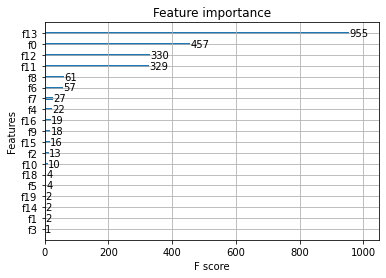

In [ ]:
plot_importance(xgb_model)
plt.show()


In [ ]:
list(zip(range(20),list(x.columns)))

[(0, 'battery_power'),
 (1, 'blue'),
 (2, 'clock_speed'),
 (3, 'dual_sim'),
 (4, 'fc'),
 (5, 'four_g'),
 (6, 'int_memory'),
 (7, 'm_dep'),
 (8, 'mobile_wt'),
 (9, 'n_cores'),
 (10, 'pc'),
 (11, 'px_height'),
 (12, 'px_width'),
 (13, 'ram'),
 (14, 'sc_h'),
 (15, 'sc_w'),
 (16, 'talk_time'),
 (17, 'three_g'),
 (18, 'touch_screen'),
 (19, 'wifi')]

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)


In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)

In [ ]:
print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       365
           2       1.00      1.00      1.00       349
           3       1.00      1.00      1.00       337

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



              precision    recall  f1-score   support

           0       0.90      0.90      0.90       151
           1       0.77      0.78      0.77       135
           2       0.77      0.77      0.77       151
           3       0.88      0.88      0.88       163

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600



#KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
train_class_preds = neigh.predict(x_train)
test_class_preds = neigh.predict(x_test)

In [ ]:
print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       349
           1       0.56      0.65      0.60       365
           2       0.62      0.56      0.59       349
           3       0.86      0.70      0.77       337

    accuracy                           0.68      1400
   macro avg       0.69      0.68      0.68      1400
weighted avg       0.69      0.68      0.68      1400



              precision    recall  f1-score   support

           0       0.64      0.68      0.66       151
           1       0.38      0.48      0.43       135
           2       0.42      0.42      0.42       151
           3       0.77      0.55      0.64       163

    accuracy                           0.54       600
   macro avg       0.55      0.53      0.54       600
weighted avg       0.56      0.54      0.54       600



#Droping some features

In [ ]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
x=x.loc[:,['battery_power','int_memory','px_height','px_width','ram']]

In [ ]:
x

,battery_power,int_memory,px_height,px_width,ram
0,842,7,20,756,2549
1,1021,53,905,1988,2631
2,563,41,1263,1716,2603
3,615,10,1216,1786,2769
4,1821,44,1208,1212,1411
...,...,...,...,...,...
1995,794,2,1222,1890,668
1996,1965,39,915,1965,2032
1997,1911,36,868,1632,3057
1998,1512,46,336,670,869


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.30)

In [ ]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train,y_train)
train_class_preds = xgb_model.predict(x_train)
test_class_preds = xgb_model.predict(x_test)

print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.98      0.98      0.98       365
           2       0.98      0.98      0.98       349
           3       1.00      0.99      0.99       337

    accuracy                           0.98      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.98      0.99      1400



              precision    recall  f1-score   support

           0       0.95      0.98      0.96       151
           1       0.90      0.89      0.89       135
           2       0.89      0.84      0.86       151
           3       0.92      0.94      0.93       163

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.92      0.91       600



In [ ]:
xgb_model = XGBClassifier(random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5],
    'n_estimators':[25,50,75,100,150,200]

}

In [ ]:
random_search = GridSearchCV(xgb_model, param,cv=5)


In [ ]:
random_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [25, 50, 

In [ ]:
random_search.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 75}

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model.fit(x_train,y_train)
train_class_preds = xgb_model.predict(x_train)
test_class_preds = xgb_model.predict(x_test)
print(classification_report(y_train, train_class_preds))
print("\n")
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       365
           2       1.00      1.00      1.00       349
           3       1.00      1.00      1.00       337

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



              precision    recall  f1-score   support

           0       0.95      0.98      0.96       151
           1       0.92      0.88      0.90       135
           2       0.88      0.84      0.86       151
           3       0.90      0.94      0.92       163

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [ ]:
from sklearn.model_selection import cross_validate

#Cross validation xgBOOST

In [ ]:
scoring = ['accuracy']
scores = cross_validate(xgb_model,x, y, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. , accuracy=(train=1.000, test=0.930), total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............. , accuracy=(train=1.000, test=0.922), total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ............. , accuracy=(train=1.000, test=0.915), total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV] ............. , accuracy=(train=1.000, test=0.910), total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV] ............. , accuracy=(train=1.000, test=0.897), total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [ ]:
scores['train_accuracy']

array([1., 1., 1., 1., 1.])

In [ ]:
scores['test_accuracy']

array([0.93  , 0.9225, 0.915 , 0.91  , 0.8975])

#Cross validation KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7) 

In [ ]:
scoring = ['accuracy']
scores = cross_validate(neigh,x, y, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.951, test=0.935), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.944, test=0.938), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.943, test=0.920), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.951, test=0.925), total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV] ............. , accuracy=(train=0.954, test=0.910), total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [ ]:
scores['train_accuracy']

array([0.95125, 0.94375, 0.9425 , 0.95125, 0.95375])

In [ ]:
scores['test_accuracy']

array([0.935 , 0.9375, 0.92  , 0.925 , 0.91  ])